<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Spectral_Class  240 non-null    object 
 5   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB
26.202999076912434
[[ 0.59151371  0.71908238]
 [-0.70860632  1.00618032]
 [-0.36990589 -0.12928879]
 [ 2.63345997 -1.06731937]
 [ 0.27698679 -0.91234415]
 [-0.66906977 -1.27268416]
 [ 1.42476503 -0.95902108]]
5


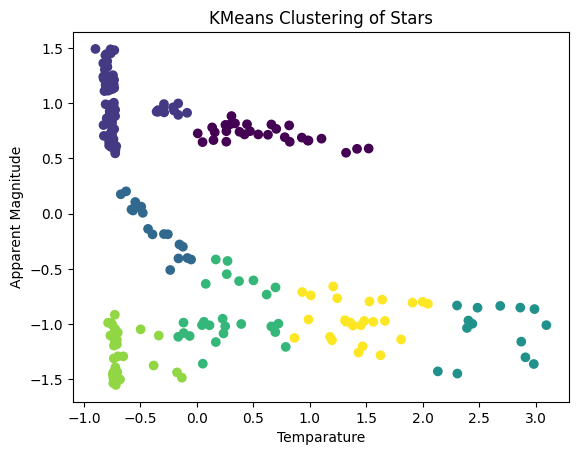

Precision: 0.48211744639376225
Recall: 0.20833333333333334
F1 Score: 0.281240873220739
Specificity: 0.0
G-measure: 0.2909436490319181
Accuracy: 0.20833333333333334
Davies–Bouldin Index: 0.5511063892144366


In [2]:
#importing packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import accuracy_score

#loading dataset
data = pd.read_csv('Stars_data.csv')

data.head()

data.info()

data.columns

label_encoder = LabelEncoder()
data['Spectral_Class'] = label_encoder.fit_transform(data['Spectral_Class'])

X = data[['Temperature', 'A_M']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

km = KMeans(init='random', n_clusters=7, n_init=10 , random_state=42)

km.fit(X_scaled)

print(km.inertia_)  #lowest SSE value

print(km.cluster_centers_)  #cluster centroids

print(km.n_iter_)

labels = km.labels_

data['cluster'] = labels

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('Temparature')
plt.ylabel('Apparent Magnitude') #Apparent Magnitude = Actual Luminosity / Luminosity Of Sun
plt.title('KMeans Clustering of Stars')
plt.show()

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have ground truth labels in 'True_Labels' column
true_labels = data['Spectral_Class']

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, labels)

# Calculate precision, recall, F1-score
precision = precision_score(true_labels, labels, average='weighted')
recall = recall_score(true_labels, labels, average='weighted')
f1 = f1_score(true_labels, labels, average='weighted')

# Calculate specificity
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# Calculate G-measure
g_measure = 2 * (precision * recall) / (precision + recall)

# Calculate accuracy
accuracy = accuracy_score(true_labels, labels)

# Calculate Davies–Bouldin index
davies_bouldin_index = davies_bouldin_score(X_scaled, labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("G-measure:", g_measure)
print("Accuracy:", accuracy)
print("Davies–Bouldin Index:", davies_bouldin_index)